<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/21_CNN(ImageClassification)_Using_SVM/Convolutional_Neural_Network_Using_SVM_as_Final_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Convolutional Neural Network Using SVM as Final Layer¶</b></h1>

Understanding Of SVM

* Part 1: https://www.youtube.com/watch?v=H9yACitf-KM
* Part 2: https://www.youtube.com/watch?v=Js3GLb1xPhc

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.4.1'

In [5]:
train_path = "D:\\Deep_Learning\\21_CNN(ImageClassification)_Using_SVM\\train"
val_path =  "D:\\Deep_Learning\\21_CNN(ImageClassification)_Using_SVM\\val"
test_path =  "D:\\Deep_Learning\\21_CNN(ImageClassification)_Using_SVM\\test"

In [6]:
# Part 1 - Data Preprocessing
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

val_set = val_datagen.flow_from_directory(val_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 24500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [11]:
## for mulitclassification
#cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))
#cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [13]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(training_set, validation_data=val_set, epochs = 15)

Epoch 1/15
766/766 [==============================] - 293s 381ms/step - loss: 0.8598 - accuracy: 0.5917 - val_loss: 0.5715 - val_accuracy: 0.7140
Epoch 2/15
766/766 [==============================] - 107s 140ms/step - loss: 0.6203 - accuracy: 0.7097 - val_loss: 0.5438 - val_accuracy: 0.7100
Epoch 3/15
766/766 [==============================] - 107s 139ms/step - loss: 0.5696 - accuracy: 0.7300 - val_loss: 0.4831 - val_accuracy: 0.7960
Epoch 4/15
766/766 [==============================] - 107s 139ms/step - loss: 0.5242 - accuracy: 0.7601 - val_loss: 0.4611 - val_accuracy: 0.8040
Epoch 5/15
766/766 [==============================] - 105s 137ms/step - loss: 0.5167 - accuracy: 0.7629 - val_loss: 0.4637 - val_accuracy: 0.7920
Epoch 6/15
766/766 [==============================] - 107s 140ms/step - loss: 0.4798 - accuracy: 0.7746 - val_loss: 0.5007 - val_accuracy: 0.8180
Epoch 7/15
766/766 [==============================] - 107s 139ms/step - loss: 0.4771 - accuracy: 0.7786 - val_loss: 0.4150 -

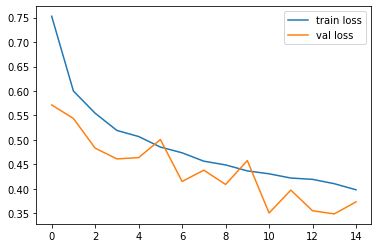

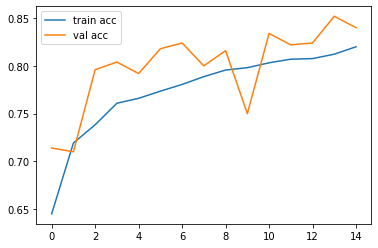

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [17]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [29]:
#Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.flow_from_directory(test_path+'/', target_size = (64, 64), batch_size = 32)

Found 0 images belonging to 0 classes.


[[2.7685993]]


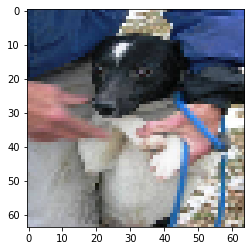

In [45]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image1 = image.load_img(test_path +'/1.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
plt.imshow(test_image1)

In [46]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


[[-1.4428813]]


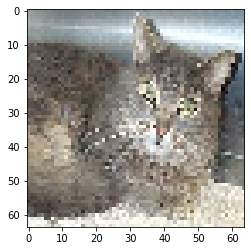

In [51]:
# Part 4 - Making a single prediction

test_image1 = image.load_img(test_path +'/7.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
plt.imshow(test_image1)

In [52]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat
